In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('q5.csv', dtype='unicode')

In [2]:
df = df.drop(df.columns[0], axis=1)

In [3]:
df.shape

(8218, 21)

In [4]:
df.columns

Index(['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Year', 'Hour', 'Rush_Hour', 'Speed_Classification', 'Month',
       'light_group', 'Junction_group'],
      dtype='object')

In [5]:
df.head(5)

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,Junction_Control,...,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year,Hour,Rush_Hour,Speed_Classification,Month,light_group,Junction_group
0,3,2,1,29/09/2009,3,18:05,Dual carriageway,70,NaN,NaN,...,Fine without high winds,Dry,1,2009,18,1,Highway,9,1.0,NaN
1,2,2,2,01/05/2009,6,15:55,Dual carriageway,60,NaN,NaN,...,Fine without high winds,Dry,1,2009,15,0,Highway,5,1.0,NaN
2,3,2,1,05/09/2009,7,17:00,Slip road,70,NaN,Giveway or uncontrolled,...,Fine without high winds,Dry,1,2009,17,0,Highway,9,1.0,NaN
3,3,4,1,29/04/2009,4,12:36,Dual carriageway,60,NaN,Giveway or uncontrolled,...,Fine without high winds,Dry,1,2009,12,0,Highway,4,1.0,NaN
4,3,2,3,22/04/2009,4,07:55,Dual carriageway,70,NaN,NaN,...,Fine without high winds,Dry,1,2009,7,1,Highway,4,1.0,NaN


In [6]:
hour_counts_by_year = df.groupby(['Year', 'Hour']).size().reset_index(name='Count')
print(hour_counts_by_year)

     Year Hour  Count
0    2009    0     18
1    2009    1     13
2    2009   10     67
3    2009   11     61
4    2009   12     90
..    ...  ...    ...
139  2014    5     15
140  2014    6     26
141  2014    7     69
142  2014    8     91
143  2014    9     69

[144 rows x 3 columns]


In [7]:
from scipy.stats import f_oneway

pivot_table = hour_counts_by_year.pivot(index='Year', columns='Hour', values='Count').fillna(0)

anova_data = [pivot_table[hour].values for hour in pivot_table.columns]

f_stat, p_value = f_oneway(*anova_data)

print(f"F-Statistic: {f_stat}")
print(f"p-value: {p_value}")

F-Statistic: 113.78589690231327
p-value: 2.0904201650348305e-70


In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Count ~ C(Hour)', data=hour_counts_by_year).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(Hour),244536.638889,23.0,113.785897,2.090420e-70
Residual,11212.666667,120.0,NaN,NaN


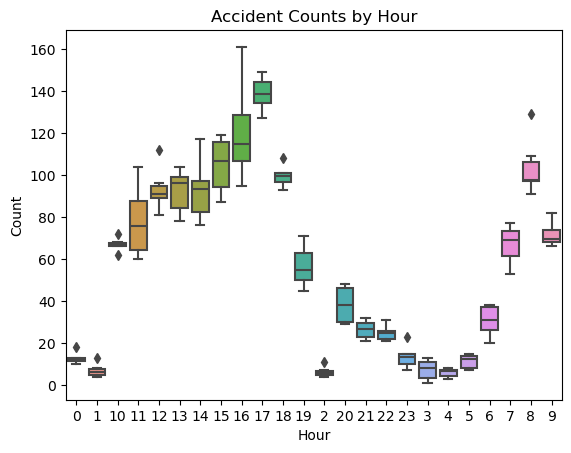

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
sns.boxplot(x='Hour', y='Count', data=hour_counts_by_year)
plt.title("Accident Counts by Hour")
plt.show()
